<a href="https://colab.research.google.com/github/Prashant-op/Cardiovascular-Risk-Pridiction1/blob/main/Prashant_Bhardwaj_Capstone_Cardiovascular_Risk_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

 The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.


Variables

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


Data Description
Demographic:

• Sex: male or female("M" or "F")


• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")


• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset initialization

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Alma Better/Cohort Nilgiri/Module 5/Week 1/Day 1/data_cardiovascular_risk.csv")

In [4]:
data

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0        0   64        2.0   F  ...    NaN       90.0     80.0           1
1        1   36        4.0   M  ...  29.77       72.0     75.0           0
2        2   46        1.0   F  ...  20.35       88.0     94.0           0
3        3   50        1.0   M  ...  28.26       68.0     94.0           1
4        4   64        1.0   F  ...  26.42       70.0     77.0           0
...    ...  ...        ...  ..  ...    ...        ...      ...         ...
3385  3385   60        1.0   F  ...  29.28       70.0    103.0           0
3386  3386   46        1.0   F  ...  21.96       80.0     84.0           0
3387  3387   44        3.0   M  ...  28.92       73.0     72.0           1
3388  3388   60        1.0   M  ...  23.01       80.0     85.0           0
3389  3389   54        3.0   F  ...  29.88       79.0     92.0           0

[3390 rows x 17 columns]

In [6]:
data.head()

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0   0   64        2.0   F  ...    NaN       90.0     80.0           1
1   1   36        4.0   M  ...  29.77       72.0     75.0           0
2   2   46        1.0   F  ...  20.35       88.0     94.0           0
3   3   50        1.0   M  ...  28.26       68.0     94.0           1
4   4   64        1.0   F  ...  26.42       70.0     77.0           0

[5 rows x 17 columns]

In [7]:
data.tail()

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
3385  3385   60        1.0   F  ...  29.28       70.0    103.0           0
3386  3386   46        1.0   F  ...  21.96       80.0     84.0           0
3387  3387   44        3.0   M  ...  28.92       73.0     72.0           1
3388  3388   60        1.0   M  ...  23.01       80.0     85.0           0
3389  3389   54        3.0   F  ...  29.88       79.0     92.0           0

[5 rows x 17 columns]

Now I am split our dataset in two part, train and test part

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['TenYearCHD'], random_state = 1)

In [9]:
train_data.shape

(2712, 17)

In [10]:
test_data.shape

(678, 17)

In [11]:
train_data.describe(include='all')

id          age  ...      glucose   TenYearCHD
count   2712.000000  2712.000000  ...  2473.000000  2712.000000
unique          NaN          NaN  ...          NaN          NaN
top             NaN          NaN  ...          NaN          NaN
freq            NaN          NaN  ...          NaN          NaN
mean    1697.519912    49.580015  ...    82.095835     0.150811
std      978.104904     8.585428  ...    24.350248     0.357931
min        0.000000    32.000000  ...    43.000000     0.000000
25%      854.750000    42.000000  ...    71.000000     0.000000
50%     1699.500000    49.000000  ...    78.000000     0.000000
75%     2537.250000    56.250000  ...    87.000000     0.000000
max     3389.000000    70.000000  ...   394.000000     1.000000

[11 rows x 17 columns]

In [12]:
train_data.shape

(2712, 17)

In [13]:
pd.DataFrame(train_data.dtypes).rename(columns={0:'dtype'})

dtype
id                 int64
age                int64
education        float64
sex               object
is_smoking        object
cigsPerDay       float64
BPMeds           float64
prevalentStroke    int64
prevalentHyp       int64
diabetes           int64
totChol          float64
sysBP            float64
diaBP            float64
BMI              float64
heartRate        float64
glucose          float64
TenYearCHD         int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2712 non-null   int64  
 1   age              2712 non-null   int64  
 2   education        2643 non-null   float64
 3   sex              2712 non-null   object 
 4   is_smoking       2712 non-null   object 
 5   cigsPerDay       2695 non-null   float64
 6   BPMeds           2679 non-null   float64
 7   prevalentStroke  2712 non-null   int64  
 8   prevalentHyp     2712 non-null   int64  
 9   diabetes         2712 non-null   int64  
 10  totChol          2681 non-null   float64
 11  sysBP            2712 non-null   float64
 12  diaBP            2712 non-null   float64
 13  BMI              2701 non-null   float64
 14  heartRate        2711 non-null   float64
 15  glucose          2473 non-null   float64
 16  TenYearCHD       2712 non-null   int64  
dtypes: float64(9)

In [15]:
numerical_features=list(data.describe().columns)

numerical_features

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [16]:
## Correlation
# import seaborn as sns
# plt.figure(figsize=(15,8))
# correlation = train_data.corr()
# sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# ***`Exploratory Data Analysis`***

In [17]:
train_data.drop(['id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2643 non-null   float64
 2   sex              2712 non-null   object 
 3   is_smoking       2712 non-null   object 
 4   cigsPerDay       2695 non-null   float64
 5   BPMeds           2679 non-null   float64
 6   prevalentStroke  2712 non-null   int64  
 7   prevalentHyp     2712 non-null   int64  
 8   diabetes         2712 non-null   int64  
 9   totChol          2681 non-null   float64
 10  sysBP            2712 non-null   float64
 11  diaBP            2712 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2711 non-null   float64
 14  glucose          2473 non-null   float64
 15  TenYearCHD       2712 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 360.2+ KB


we drop the id  column because there is no correlation with Heart Disease.

# ***`Data Visualisation`***





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


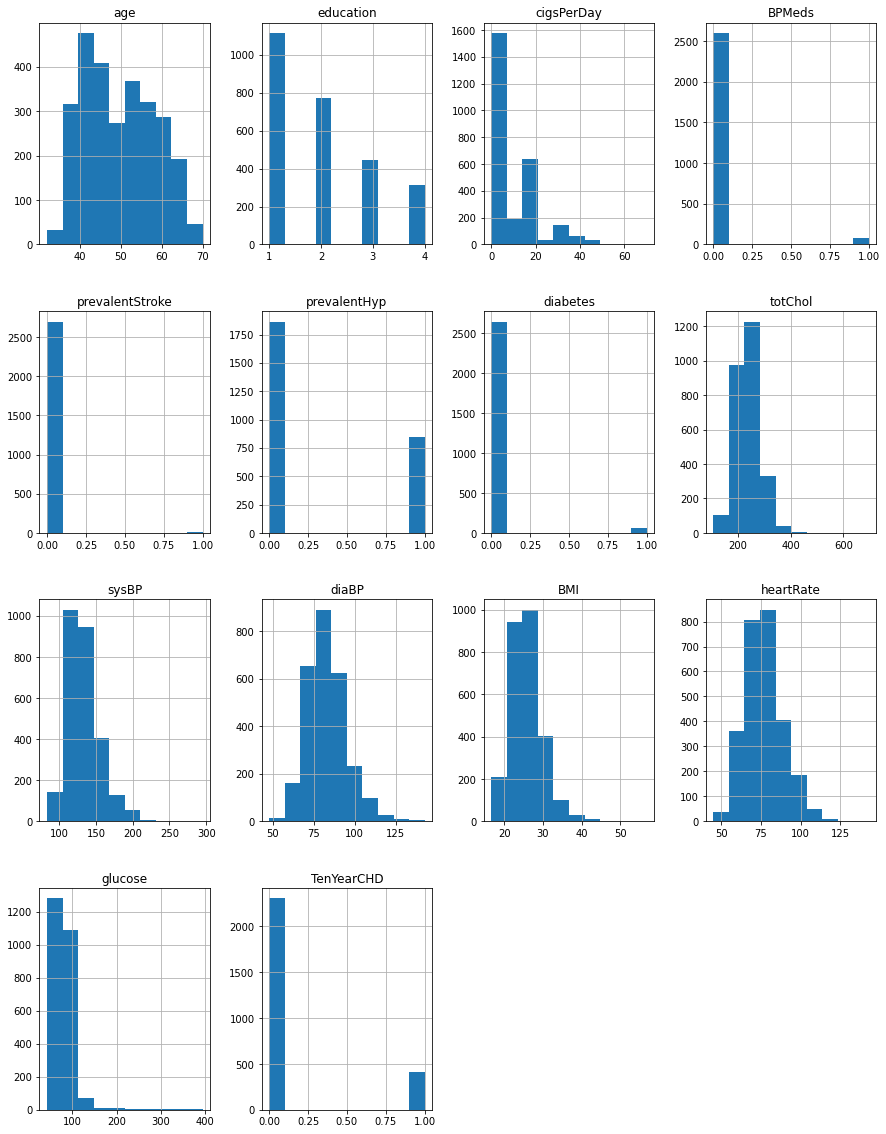

In [19]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_data.hist(ax = ax)
plt.show()

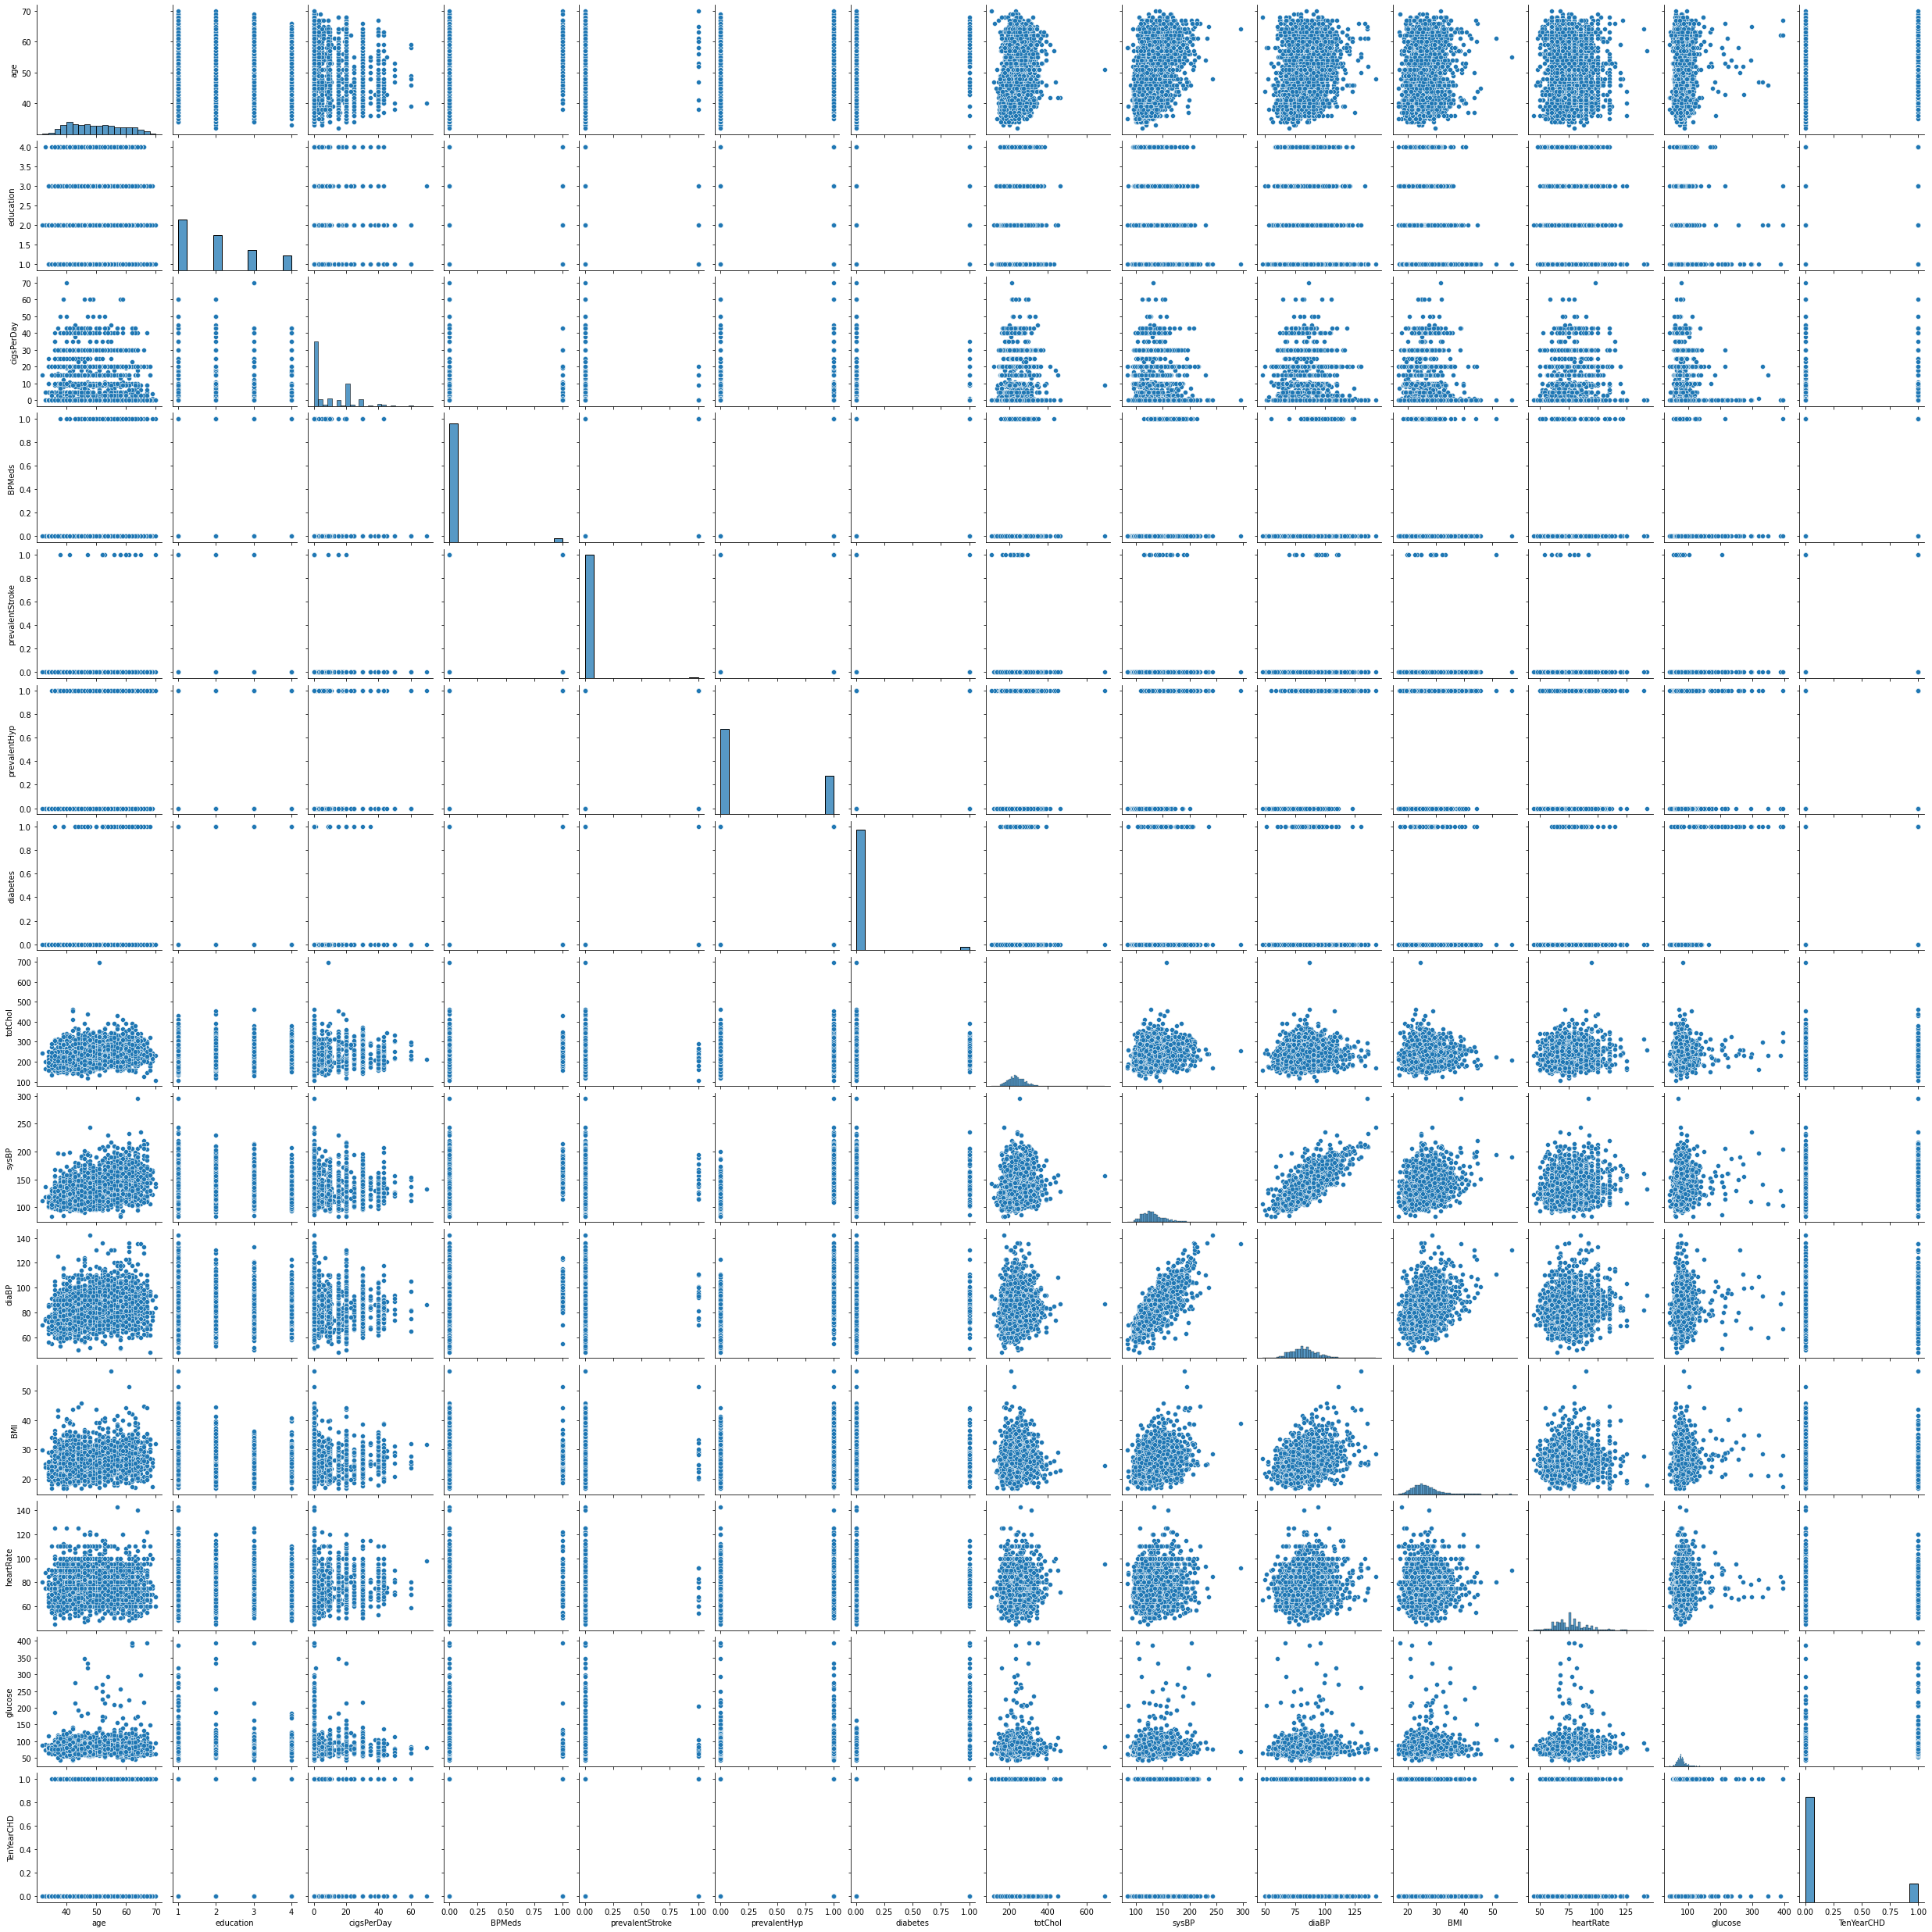

In [20]:
sns.pairplot(train_data)
plt.show()

Box Plot and Dist plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


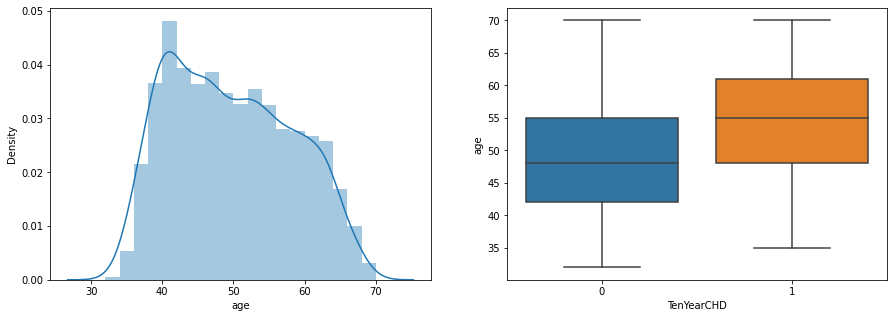

In [21]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['age'], ax=axes[0])
sns.boxplot(y='age',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


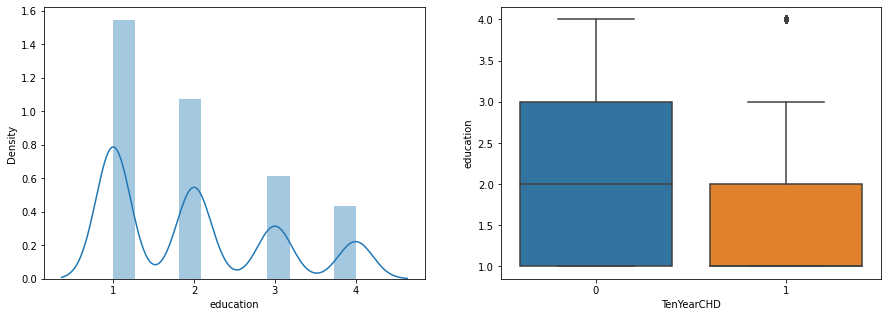

In [22]:
#Box plot of education and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['education'], ax=axes[0])
sns.boxplot(y='education',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


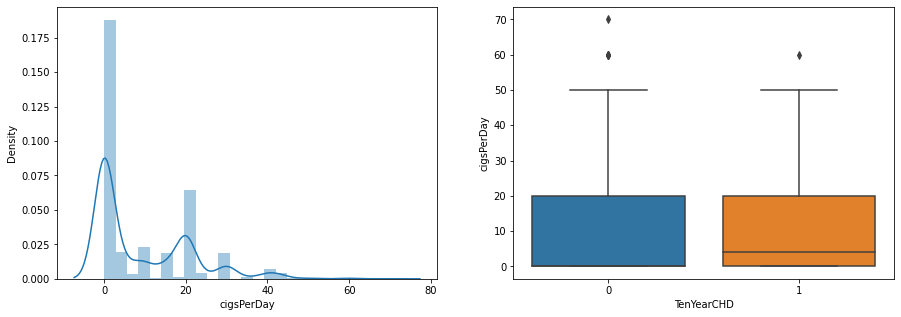

In [23]:
#Box plot of cigsPerDay and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['cigsPerDay'], ax=axes[0])
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=train_data, ax=axes[1])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


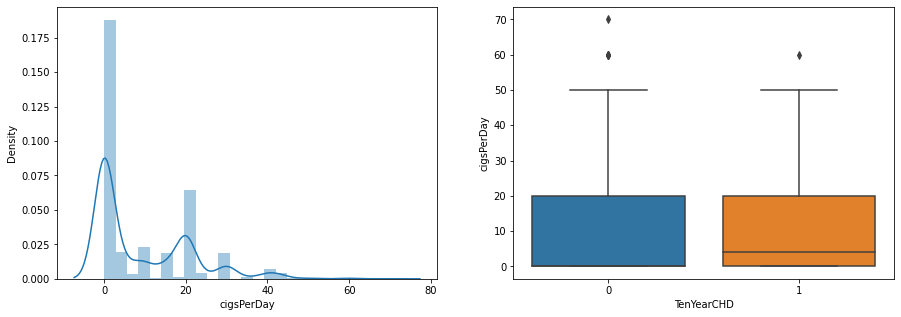

In [23]:
##Box plot of cigsPerDay and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['cigsPerDay'], ax=axes[0])
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


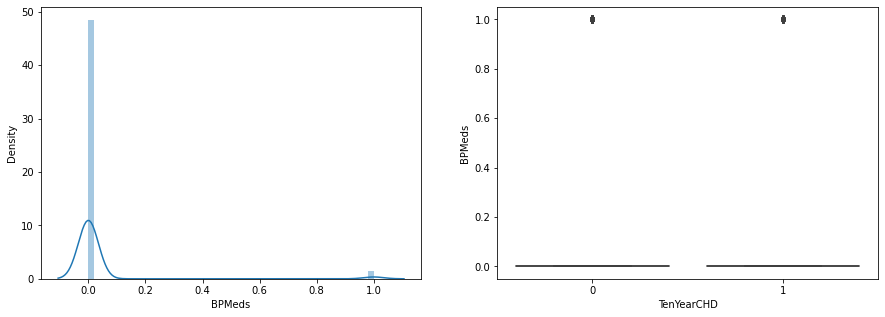

In [24]:
#Box plot of BPMeds and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['BPMeds'], ax=axes[0])
sns.boxplot(y='BPMeds',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


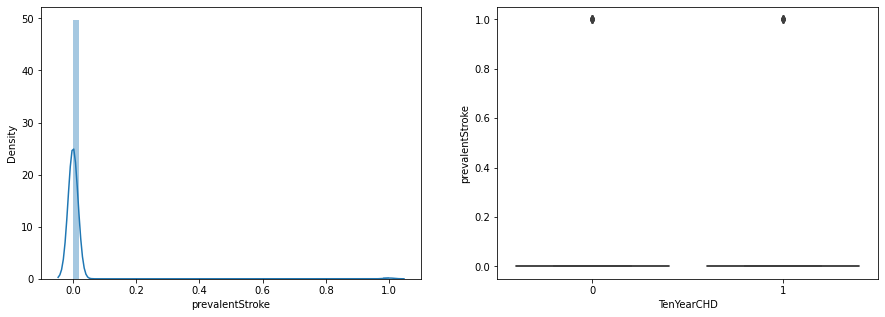

In [25]:
#Box plot of Prevalentstroke and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['prevalentStroke'], ax=axes[0])
sns.boxplot(y='prevalentStroke',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


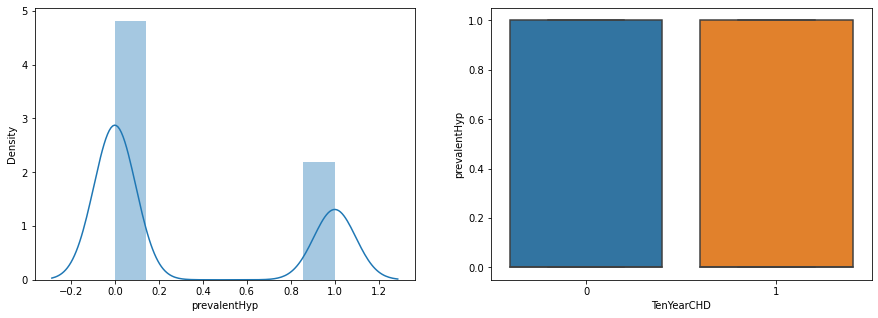

In [25]:
#Box plot of PrevalentHyp and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['prevalentHyp'], ax=axes[0])
sns.boxplot(y='prevalentHyp',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


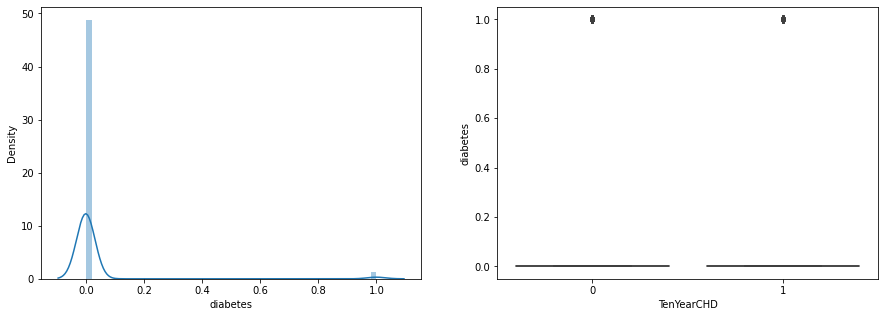

In [26]:
#Box plot of diabetes and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['diabetes'], ax=axes[0])
sns.boxplot(y='diabetes',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


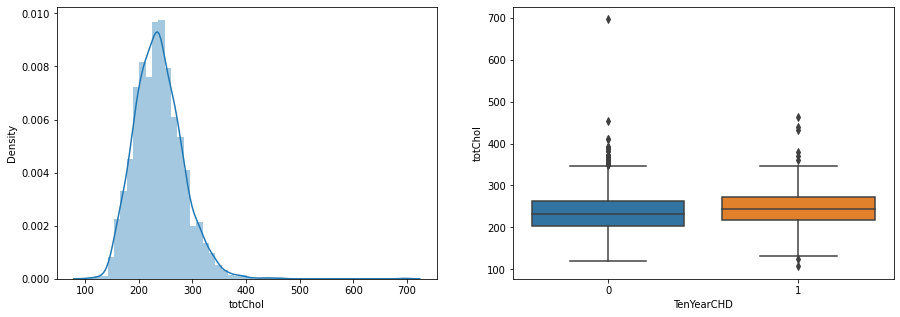

In [27]:
##Box plot of totchol and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['totChol'], ax=axes[0])
sns.boxplot(y='totChol',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


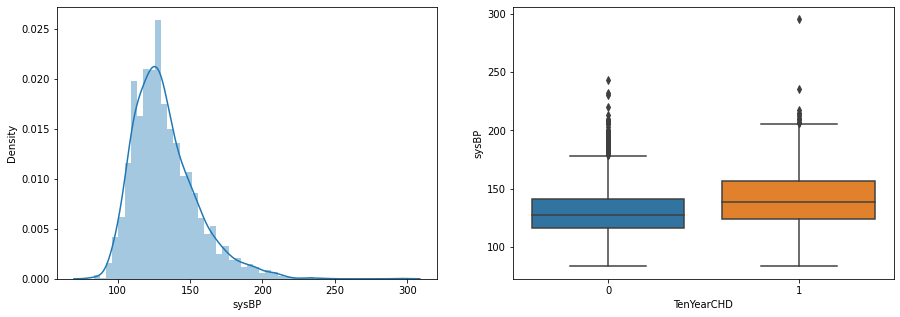

In [28]:
#Box plot of Prevalentstroke and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['sysBP'], ax=axes[0])
sns.boxplot(y='sysBP',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


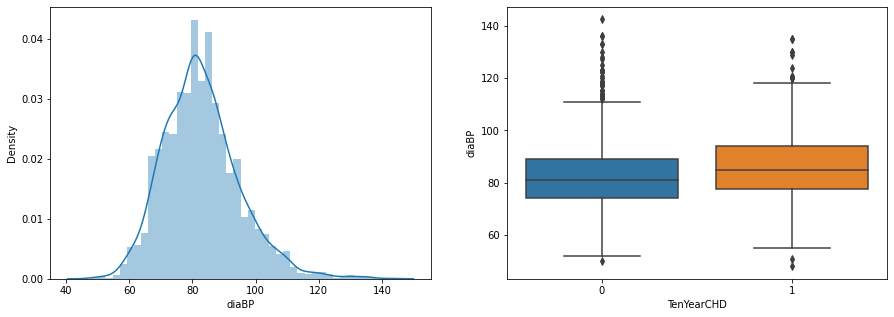

In [29]:
#Box plot of diaBP  and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['diaBP'], ax=axes[0])
sns.boxplot(y='diaBP',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


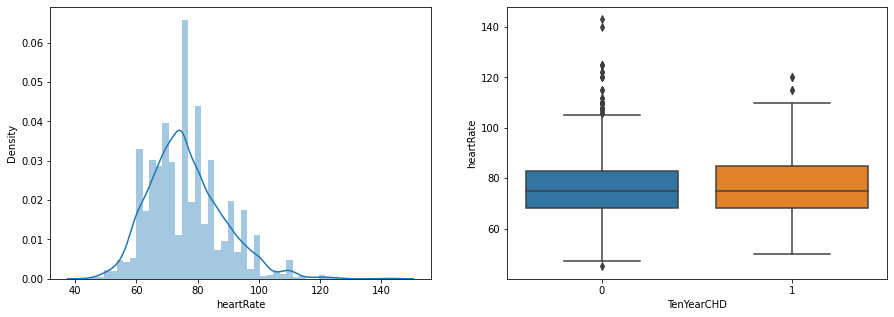

In [30]:
###Box plot of heartRate and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['heartRate'], ax=axes[0])
sns.boxplot(y='heartRate',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


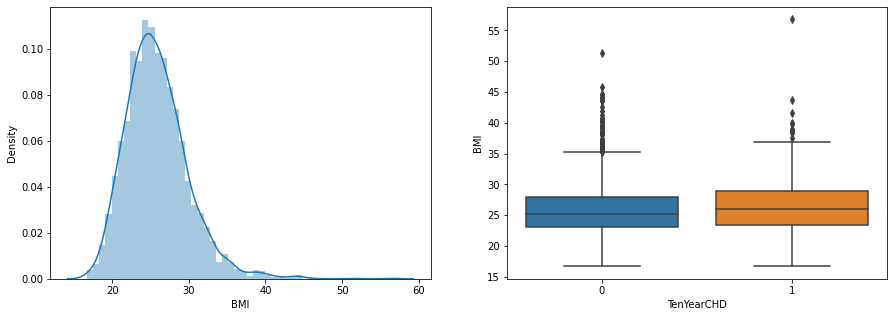

In [31]:
##Box plot of BMI and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['BMI'], ax=axes[0])
sns.boxplot(y='BMI',x='TenYearCHD',data=train_data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


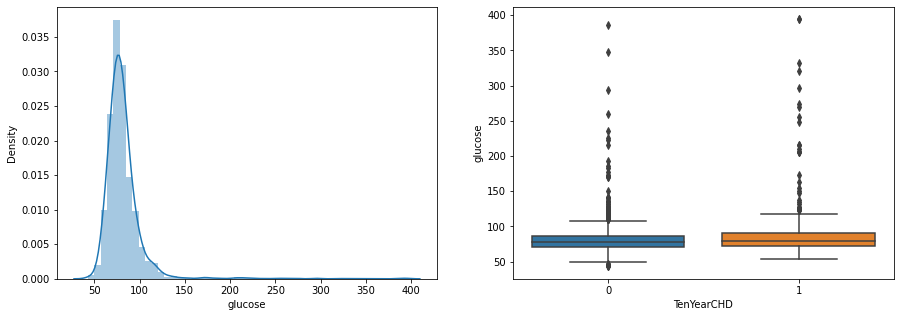

In [32]:
##Box plot of Glucose and TenYearCHD
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['glucose'], ax=axes[0])
sns.boxplot(y='glucose',x='TenYearCHD',data=train_data, ax=axes[1])

In [53]:
#find out NaN value or Null value
train_data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Glucose having large missing value

In [54]:
#total percentage of missing data
Null_Value=train_data.isna().sum()
Total_Null_Value=sum(Null_Value)
Total_Null_Value
print(f'Percentage of Total  missing value of data set is', Total_Null_Value*100/len(data['age']) ,'%')
print(f'Percentage of  missing value in  a Glucose column   is', 239*100/len(train_data['age']) ,'%')

Percentage of Total  missing value of data set is 0.0 %
Percentage of  missing value in  a Glucose column   is 8.812684365781712 %


In [36]:
Total_Null_Value

401

The  glucose entry has the highest percentage of missing data i.e at 8.812552 % the rest have very few missing entries.

Since missing entries account for only 11.82 % of the total data we can impute these entries

In [39]:
import statistics
print(f'median of glucose feature',train_data['glucose'].median())
print(f'mode of education feature',train_data['education'].mode())
print(f'mode of BPMeds',train_data['BPMeds'].mode())
print(f'median of totChol',train_data['totChol'].median())
print(f'median of cigsPerDay	',train_data['cigsPerDay'].median())
print(f'median of BMI',train_data['BMI'].median())
print(f'median of heartRate',train_data['heartRate'].median())

median of glucose feature 78.0
mode of education feature 0    1.0
dtype: float64
mode of BPMeds 0    0.0
dtype: float64
median of totChol 234.0
median of cigsPerDay	 0.0
median of BMI 25.38
median of heartRate 75.0


In [40]:
train_data['glucose'] = train_data['glucose'].fillna(train_data['glucose'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode().iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
train_data['BPMeds'] = train_data['BPMeds'].fillna(train_data['BPMeds'].mode().iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
train_data['totChol'] = train_data['totChol'].fillna(train_data['totChol'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
train_data['cigsPerDay'] = train_data['cigsPerDay'].fillna(train_data['cigsPerDay'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train_data['BMI'] = train_data['BMI'].fillna(train_data['BMI'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
train_data['heartRate'] = train_data['heartRate'].fillna(train_data['heartRate'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train_data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [56]:
Target_variable = data['TenYearCHD'].value_counts()
Target_variable

0    2879
1     511
Name: TenYearCHD, dtype: int64

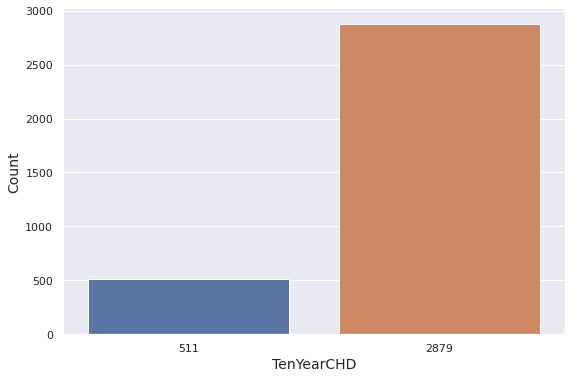

In [57]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.barplot(y= Target_variable.index, x= Target_variable[0:], data = Target_variable)
plt.xlabel('TenYearCHD', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

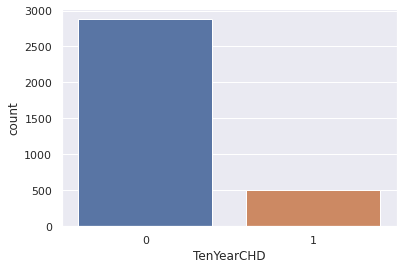

There are 2879 patients without heart disease and 511 patients with the disease


In [58]:
#This is plot of TenYearCHD, So we can easily Visualize How much our data set is unbalnced.
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

Now Clearly, data set  is Unbalanced  as you seen in this figure.

In [59]:
train_data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dealing with Outliers

0.25    72.0
0.75    85.0
Name: glucose, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


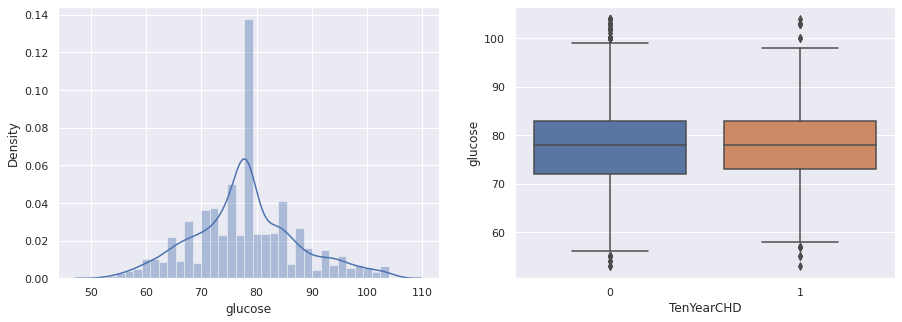

In [60]:
#dealing with outliers
vals = train_data.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['glucose'] = train_data['glucose'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['glucose'].median())

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_data['glucose'], ax=axes[0])
sns.boxplot(y='glucose',x='TenYearCHD',data=train_data, ax=axes[1])


In [61]:
#dealing with outliers 
vals = train_data.education.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['education'] = train_data['education'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['education'].mode().iloc[0])


#dealing with outliers
vals = train_data.totChol.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['totChol'] = train_data['totChol'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['totChol'].median())
#dealing with outliers
vals = train_data.cigsPerDay.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['cigsPerDay'] = train_data['cigsPerDay'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['cigsPerDay'].mean())
#dealing with outliers
vals = train_data.BMI.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['BMI'] = train_data['BMI'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['BMI'].median())
vals = train_data.heartRate.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
train_data['heartRate'] = train_data['heartRate'].apply(lambda x : x if x > min_lim and x < max_lim else train_data['heartRate'].median())

0.25    1.0
0.75    3.0
Name: education, dtype: float64
0.25    206.75
0.75    264.00
Name: totChol, dtype: float64
0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64
0.25    23.07
0.75    28.06
Name: BMI, dtype: float64
0.25    68.0
0.75    83.0
Name: heartRate, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [62]:
train_data.head(1)

age  education sex is_smoking  ...    BMI  heartRate  glucose  TenYearCHD
542   49        2.0   F        YES  ...  21.42       76.0     78.0           0

[1 rows x 16 columns]

In [64]:
numerical_features=list(train_data.describe().columns)
#["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]



In [65]:
numerical_train_data = train_data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
numerical_train_data

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
542    49        20.0    229.0  118.5   76.5  21.42       76.0     78.0
2726   51         0.0    215.0  147.0   96.0  28.59       65.0    100.0
3067   57         1.0    254.0  146.5   81.0  25.38       72.0     85.0
204    59         0.0    282.0  135.0   87.0  28.96       72.0     78.0
329    52         0.0    275.0  112.0   71.0  25.68       80.0     78.0
...   ...         ...      ...    ...    ...    ...        ...      ...
1340   62        23.0    286.0  164.0   88.0  19.53       85.0     78.0
2498   61         0.0    256.0  160.0  109.0  25.38       81.0     79.0
2731   40         0.0    251.0  135.0   87.0  31.60       75.0     80.0
2143   48        20.0    253.0  118.5   73.0  26.25       69.0     70.0
682    41         0.0    210.0  124.0   79.0  25.26       85.0     91.0

[2712 rows x 8 columns]

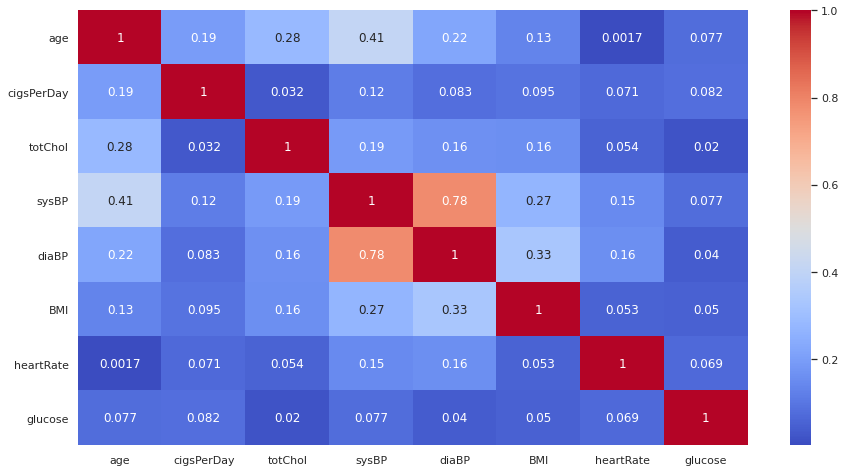

In [66]:
## Correlation
import seaborn as sns
plt.figure(figsize=(15,8))
correlation = numerical_train_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [67]:
train_data.head(1)

age  education sex is_smoking  ...    BMI  heartRate  glucose  TenYearCHD
542   49        2.0   F        YES  ...  21.42       76.0     78.0           0

[1 rows x 16 columns]

In [68]:
categorical_train_data1 =  train_data[['BPMeds','diabetes','education','is_smoking','prevalentStroke','sex','TenYearCHD']] 

In [69]:
categorical_train_data1

BPMeds  diabetes  education is_smoking  prevalentStroke sex  TenYearCHD
542      0.0         0        2.0        YES                0   F           0
2726     0.0         0        3.0         NO                0   M           0
3067     0.0         0        1.0        YES                0   F           1
204      1.0         0        4.0         NO                0   F           0
329      0.0         0        1.0         NO                0   F           0
...      ...       ...        ...        ...              ...  ..         ...
1340     0.0         0        1.0        YES                0   M           1
2498     0.0         0        1.0         NO                0   F           0
2731     0.0         0        3.0         NO                0   F           0
2143     0.0         0        1.0        YES                0   M           0
682      0.0         0        4.0         NO                0   M           0

[2712 rows x 7 columns]

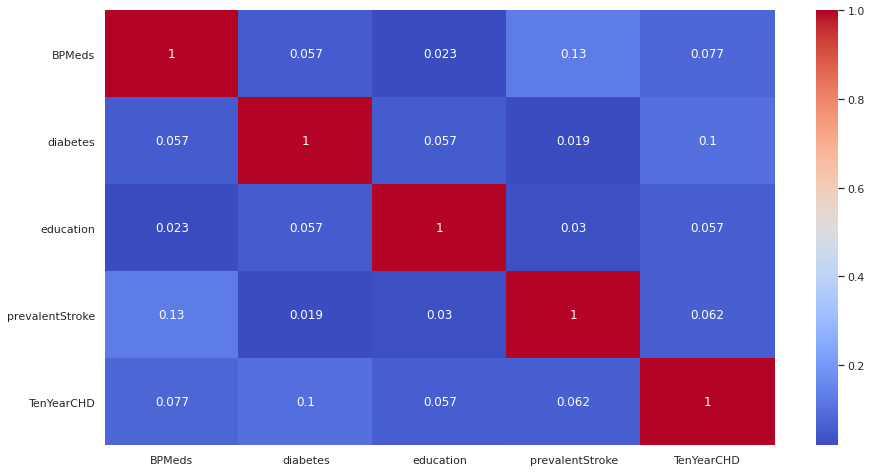

In [70]:
## Correlation
import seaborn as sns
plt.figure(figsize=(15,8))
correlation = categorical_train_data1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_train_data.values, i) for i in range(numerical_train_data.shape[1])]
vif["features"] = numerical_train_data.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


VIF Factor    features
0   43.460141         age
1    1.646810  cigsPerDay
2   36.470680     totChol
3  109.401880       sysBP
4  128.266077       diaBP
5   55.098151         BMI
6   44.450935   heartRate
7   50.980078     glucose

In [72]:
train_data.drop(columns='prevalentHyp',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
train_data 

age  education sex is_smoking  ...    BMI  heartRate  glucose  TenYearCHD
542    49        2.0   F        YES  ...  21.42       76.0     78.0           0
2726   51        3.0   M         NO  ...  28.59       65.0    100.0           0
3067   57        1.0   F        YES  ...  25.38       72.0     85.0           1
204    59        4.0   F         NO  ...  28.96       72.0     78.0           0
329    52        1.0   F         NO  ...  25.68       80.0     78.0           0
...   ...        ...  ..        ...  ...    ...        ...      ...         ...
1340   62        1.0   M        YES  ...  19.53       85.0     78.0           1
2498   61        1.0   F         NO  ...  25.38       81.0     79.0           0
2731   40        3.0   F         NO  ...  31.60       75.0     80.0           0
2143   48        1.0   M        YES  ...  26.25       69.0     70.0           0
682    41        4.0   M         NO  ...  25.26       85.0     91.0           0

[2712 rows x 15 columns]

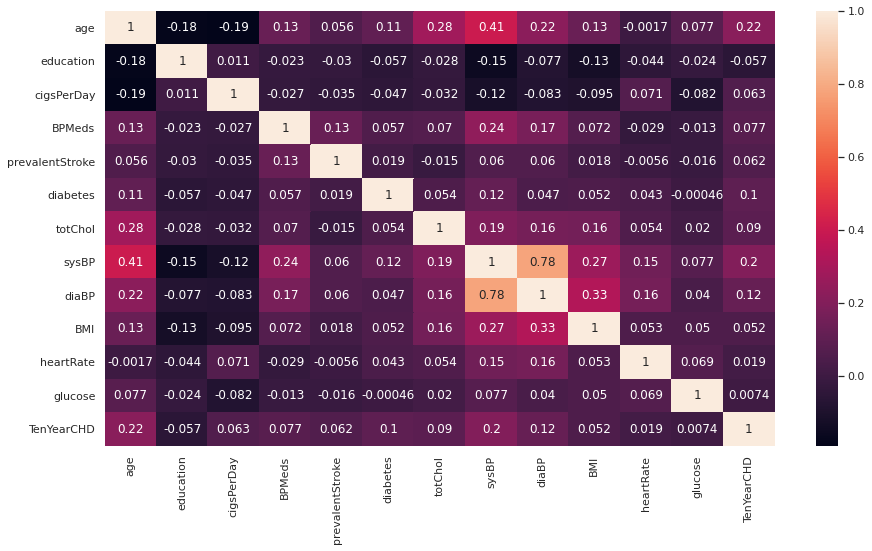

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

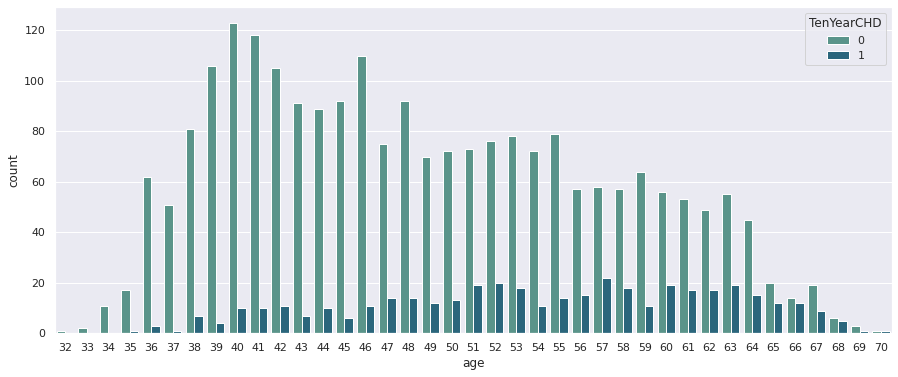

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = train_data, hue = 'TenYearCHD',palette='crest')
plt.show()

# ***`Feature Selection`***

In [76]:
top_features=['age',	'education',	'sex',	'is_smoking',	'cigsPerDay',	'BPMeds',	'diabetes',	'totChol',	'sysBP',	'BMI',	'heartRate',	'glucose']

In [95]:
train_data1= train_data.copy()
  
# calling the get_dummies method
# the first parameter mentions the
# the name of the data frame to store the
# new data frame in
# the second parameter is the list of
# columns which if not mentioned
# returns the dummies for all
# categorical columns
train_data1 = pd.get_dummies(train_data1,columns = ['sex', 'is_smoking'])
  
display(train_data1)
top_features1 = train_data1.columns[:-1].tolist()
top_features1

age  education  cigsPerDay  ...  sex_M  is_smoking_NO  is_smoking_YES
542    49        2.0        20.0  ...      0              0               1
2726   51        3.0         0.0  ...      1              1               0
3067   57        1.0         1.0  ...      0              0               1
204    59        4.0         0.0  ...      0              1               0
329    52        1.0         0.0  ...      0              1               0
...   ...        ...         ...  ...    ...            ...             ...
1340   62        1.0        23.0  ...      1              0               1
2498   61        1.0         0.0  ...      0              1               0
2731   40        3.0         0.0  ...      0              1               0
2143   48        1.0        20.0  ...      1              0               1
682    41        4.0         0.0  ...      1              1               0

[2712 rows x 17 columns]

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'sex_F',
 'sex_M',
 'is_smoking_NO']

In [79]:
top_features1 = train_data1.columns.tolist()
top_features1 'age',
 'education',
 'cigsPerDay',
 'BPMeds','prevalentStroke',
 'diabetes',
 'totChol',
 'diaBP'
 ,
 'BMI','sysBP',
 'heartRate',
 'glucose','TenYearCHD',
 
 'sex_F',
 'sex_M',
 'is_smoking_NO',
 'is_smoking_YES']

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'sex_F',
 'sex_M',
 'is_smoking_NO',
 'is_smoking_YES']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


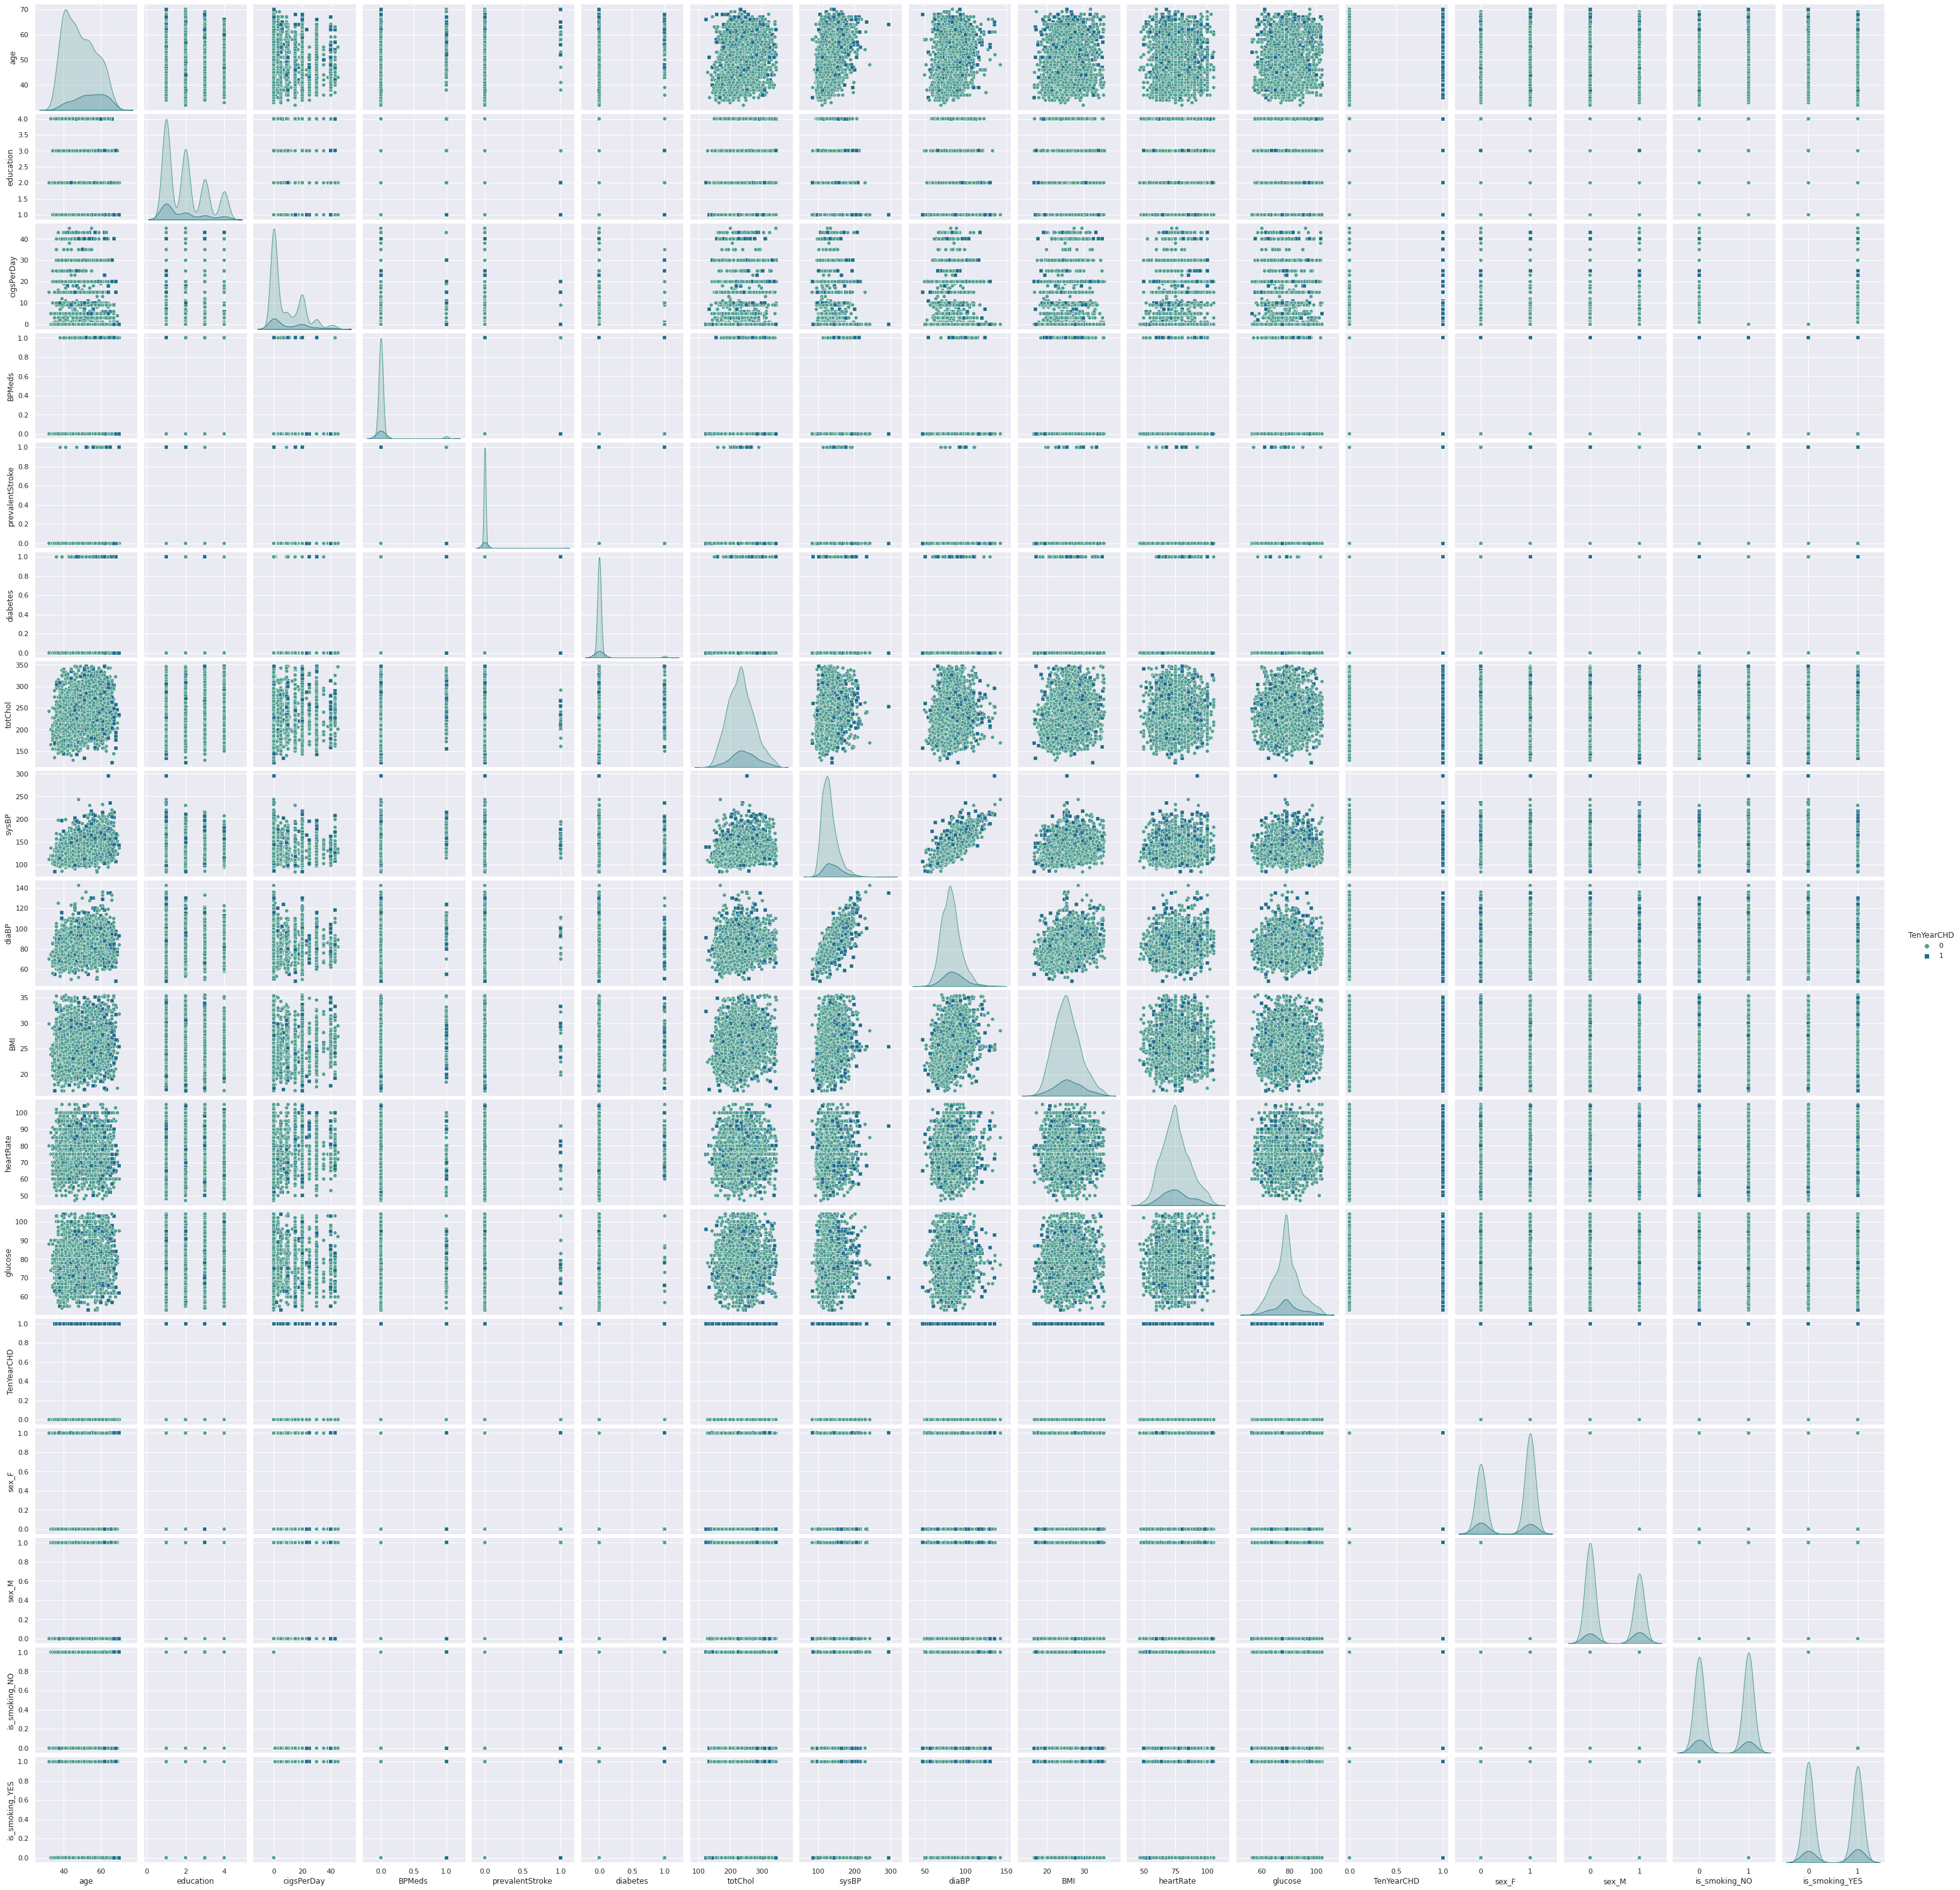

In [80]:
sns.pairplot(train_data1, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features1, palette ='crest')

# ***`Models and predictions`***

In [82]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [83]:
X = train_data1[top_features1]
y = train_data1['TenYearCHD']

In [84]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [85]:

print(num_before, num_after)

{0: 2303, 1: 409} {0: 2302, 1: 1842}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


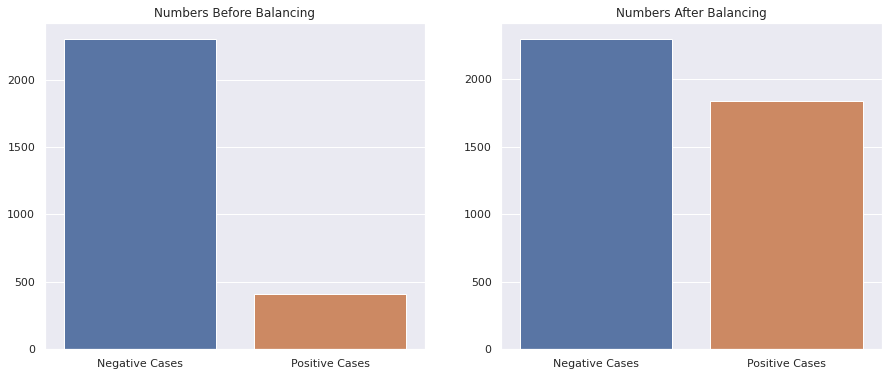

In [86]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [98]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'sex_F',
 'sex_M',
 'is_smoking_NO',]
new_data.head()

age  education  sex  is_smoking  ...  TenYearCHD  sex_F  sex_M  is_smoking_NO
0  40.0        2.0  0.0         0.0  ...         1.0    1.0    0.0              0
1  36.0        3.0  5.0         0.0  ...         0.0    0.0    1.0              0
2  53.0        2.0  0.0         0.0  ...         0.0    1.0    0.0              0
3  52.0        2.0  0.0         0.0  ...         1.0    1.0    0.0              0
4  47.0        1.0  0.0         0.0  ...         0.0    1.0    0.0              0

[5 rows x 18 columns]

In [99]:
X_new = new_data[top_features1]
y_new= new_data.iloc[:,-1]
X_new.head()
#X_new.drop(columns='TenYearCHD',inplace=True)

age  education  cigsPerDay  BPMeds  ...  TenYearCHD  sex_F  sex_M  is_smoking_NO
0  40.0        2.0         0.0     0.0  ...         1.0    1.0    0.0              0
1  36.0        3.0         0.0     0.0  ...         0.0    0.0    1.0              0
2  53.0        2.0         0.0     0.0  ...         0.0    1.0    0.0              0
3  52.0        2.0         0.0     0.0  ...         1.0    1.0    0.0              0
4  47.0        1.0         0.0     0.0  ...         0.0    1.0    0.0              0

[5 rows x 16 columns]

In [100]:
y_new

0       0
1       0
2       0
3       0
4       0
       ..
4139    1
4140    1
4141    1
4142    1
4143    1
Name: is_smoking_NO, Length: 4144, dtype: int64

In [101]:
X_new

age  education  cigsPerDay  ...     sex_F     sex_M  is_smoking_NO
0     40.000000   2.000000     0.00000  ...  1.000000  0.000000              0
1     36.000000   3.000000     0.00000  ...  0.000000  1.000000              0
2     53.000000   2.000000     0.00000  ...  1.000000  0.000000              0
3     52.000000   2.000000     0.00000  ...  1.000000  0.000000              0
4     47.000000   1.000000     0.00000  ...  1.000000  0.000000              0
...         ...        ...         ...  ...       ...       ...            ...
4139  54.498548   1.416909     0.00000  ...  0.416909  0.583091              1
4140  46.674230   1.032577     0.00000  ...  0.000000  1.000000              1
4141  54.036760   1.490810     0.49081  ...  1.000000  0.000000              1
4142  48.323710   2.709536     0.00000  ...  0.000000  1.000000              1
4143  55.041124   1.000000     0.00000  ...  1.000000  0.000000              1

[4144 rows x 16 columns]

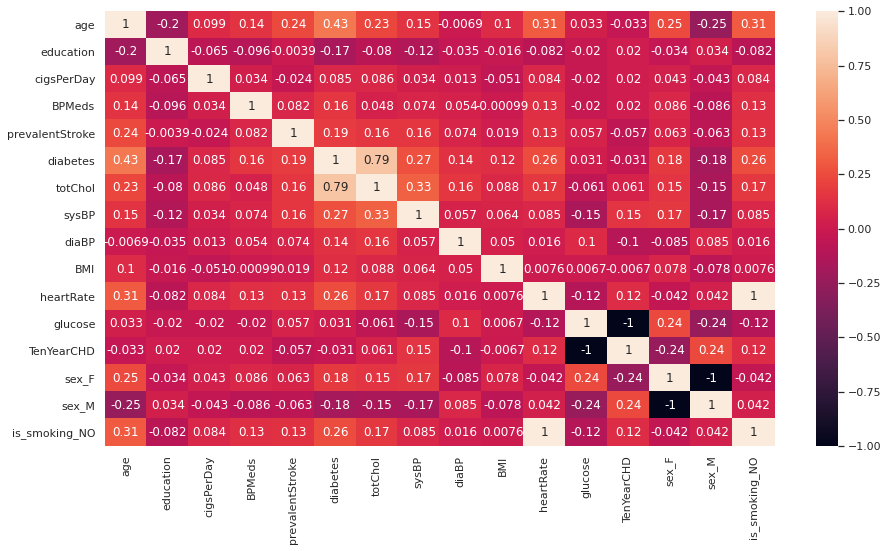

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(X_new.corr(), annot = True)
plt.show()

imputed Missing value in test data set

In [106]:
test_data

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
1532  1532   42        2.0   M  ...  21.67       74.0     74.0           0
818    818   60        1.0   M  ...  19.42       67.0    101.0           0
2830  2830   55        2.0   M  ...  26.77       68.0     78.0           0
1202  1202   45        4.0   M  ...  29.32       58.0     85.0           0
1053  1053   58        3.0   F  ...  21.81       69.0     68.0           0
...    ...  ...        ...  ..  ...    ...        ...      ...         ...
3294  3294   37        1.0   F  ...  24.61       80.0     58.0           0
2521  2521   38        4.0   F  ...  20.44       76.0     67.0           0
1514  1514   69        3.0   F  ...  20.92       85.0    103.0           0
1744  1744   49        3.0   M  ...  25.40       67.0     95.0           1
2155  2155   50        2.0   F  ...  20.30       66.0     81.0           0

[678 rows x 17 columns]

In [107]:
test_data['glucose'] = test_data['glucose'].fillna(train_data['glucose'].median())
test_data['heartRate'] = test_data['heartRate'].fillna(train_data['heartRate'].median())
test_data['education'] = test_data['education'].fillna(train_data['education'].mode().iloc[0])
test_data['BPMeds'] = test_data['BPMeds'].fillna(train_data['BPMeds'].mode().iloc[0])
test_data['BMI'] = test_data['BMI'].fillna(train_data['BMI'].median())
test_data['cigsPerDay'] = test_data['cigsPerDay'].fillna(train_data['cigsPerDay'].mean())
test_data['totChol'] = test_data['totChol'].fillna(train_data['totChol'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [108]:
test_data1= test_data.copy()
  
# calling the get_dummies method
# the first parameter mentions the
# the name of the data frame to store the
# new data frame in
# the second parameter is the list of
# columns which if not mentioned
# returns the dummies for all
# categorical columns
test_data1 = pd.get_dummies(test_data1,columns = ['sex', 'is_smoking'])
  
display(test_data1)

id  age  education  ...  sex_M  is_smoking_NO  is_smoking_YES
1532  1532   42        2.0  ...      1              0               1
818    818   60        1.0  ...      1              0               1
2830  2830   55        2.0  ...      1              1               0
1202  1202   45        4.0  ...      1              0               1
1053  1053   58        3.0  ...      0              1               0
...    ...  ...        ...  ...    ...            ...             ...
3294  3294   37        1.0  ...      0              1               0
2521  2521   38        4.0  ...      0              0               1
1514  1514   69        3.0  ...      0              1               0
1744  1744   49        3.0  ...      1              0               1
2155  2155   50        2.0  ...      0              0               1

[678 rows x 19 columns]

In [109]:
test_data2=test_data1[['age',	'education',	'cigsPerDay','BPMeds',	'diabetes'	,'totChol'	,'sysBP'	,'BMI',	'heartRate',	'glucose',	'TenYearCHD',		'sex_F'	,'sex_M',	'is_smoking_NO',	'is_smoking_YES']]

In [111]:
X_test=test_data2.drop(columns='TenYearCHD')
X_test

age  education  cigsPerDay  ...  sex_M  is_smoking_NO  is_smoking_YES
1532   42        2.0        30.0  ...      1              0               1
818    60        1.0         9.0  ...      1              0               1
2830   55        2.0         0.0  ...      1              1               0
1202   45        4.0         5.0  ...      1              0               1
1053   58        3.0         0.0  ...      0              1               0
...   ...        ...         ...  ...    ...            ...             ...
3294   37        1.0         0.0  ...      0              1               0
2521   38        4.0        15.0  ...      0              0               1
1514   69        3.0         0.0  ...      0              1               0
1744   49        3.0        40.0  ...      1              0               1
2155   50        2.0         9.0  ...      0              0               1

[678 rows x 14 columns]

In [112]:
X_train=X_new
Y_train=y_new


Y_test=test_data2.iloc[:,-1]

In [113]:
X_test

age  education  cigsPerDay  ...  sex_M  is_smoking_NO  is_smoking_YES
1532   42        2.0        30.0  ...      1              0               1
818    60        1.0         9.0  ...      1              0               1
2830   55        2.0         0.0  ...      1              1               0
1202   45        4.0         5.0  ...      1              0               1
1053   58        3.0         0.0  ...      0              1               0
...   ...        ...         ...  ...    ...            ...             ...
3294   37        1.0         0.0  ...      0              1               0
2521   38        4.0        15.0  ...      0              0               1
1514   69        3.0         0.0  ...      0              1               0
1744   49        3.0        40.0  ...      1              0               1
2155   50        2.0         9.0  ...      0              0               1

[678 rows x 14 columns]

In [114]:
Y_test=test_data2['TenYearCHD']

In [115]:
Y_test

1532    0
818     0
2830    0
1202    0
1053    0
       ..
3294    0
2521    0
1514    0
1744    1
2155    0
Name: TenYearCHD, Length: 678, dtype: int64

In [119]:
X_train.drop(columns=['diaBP','TenYearCHD'] ,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [120]:
Y_train

0       0
1       0
2       0
3       0
4       0
       ..
4139    1
4140    1
4141    1
4142    1
4143    1
Name: is_smoking_NO, Length: 4144, dtype: int64

In [121]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [123]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [124]:
#train the classifier
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [125]:

#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [126]:
log_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 15.04%


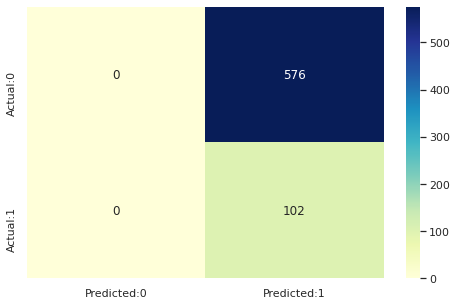

In [127]:
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78       576
           1       0.28      0.70      0.40       102

    accuracy                           0.68       678
   macro avg       0.60      0.69      0.59       678
weighted avg       0.83      0.68      0.72       678



In [128]:
logistic_f1 = f1_score(Y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 26.15%


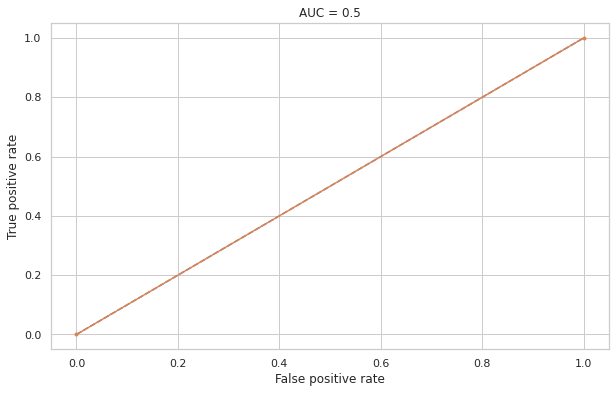

In [129]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [130]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [131]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [132]:
# train the model
tree_clf.fit(X_train,Y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [134]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [135]:
#accuracy
tree_accuracy = accuracy_score(Y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 15.34%


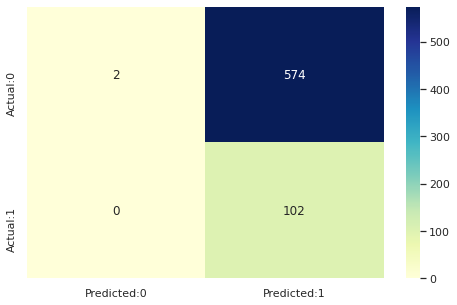

In [136]:
cm=confusion_matrix(Y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       576
           1       0.29      0.31      0.30       102

    accuracy                           0.78       678
   macro avg       0.58      0.59      0.58       678
weighted avg       0.79      0.78      0.78       678



In [ ]:
tree_f1 = f1_score(Y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 29.91%


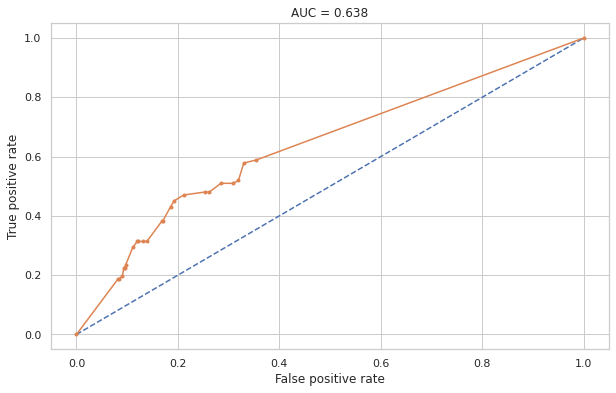

In [ ]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [ ]:

from sklearn.svm import SVC
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10,class_weight=balanced)
#train the model
svm_clf.fit(X_train,Y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [ ]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 80.97%


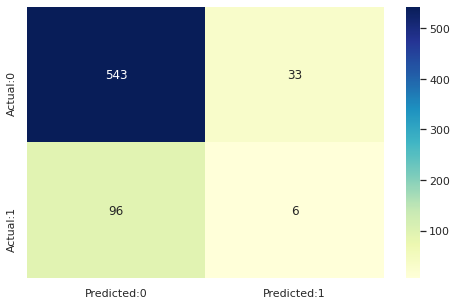

In [ ]:
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       576
           1       0.15      0.06      0.09       102

    accuracy                           0.81       678
   macro avg       0.50      0.50      0.49       678
weighted avg       0.75      0.81      0.77       678



In [ ]:
svm_f1 = f1_score(Y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 8.51%


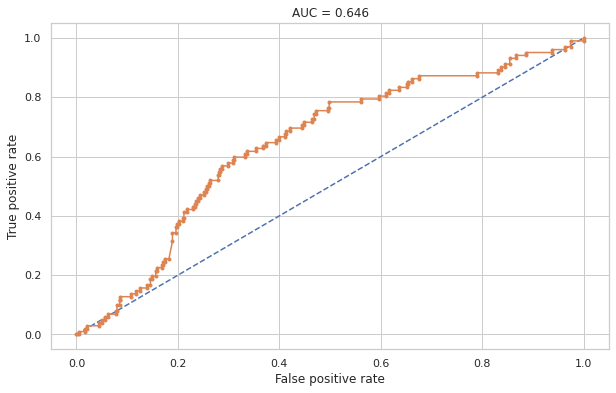

In [ ]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

# ***`KNN`***

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [ ]:
# train the model
knn_clf.fit(X_train,Y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [ ]:
#accuracy
knn_accuracy = accuracy_score(Y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 75.81%


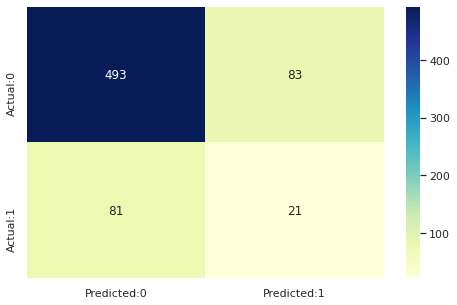

In [ ]:
cm=confusion_matrix(Y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       576
           1       0.20      0.21      0.20       102

    accuracy                           0.76       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.76      0.76      0.76       678



In [ ]:

knn_f1 = f1_score(Y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 20.39%


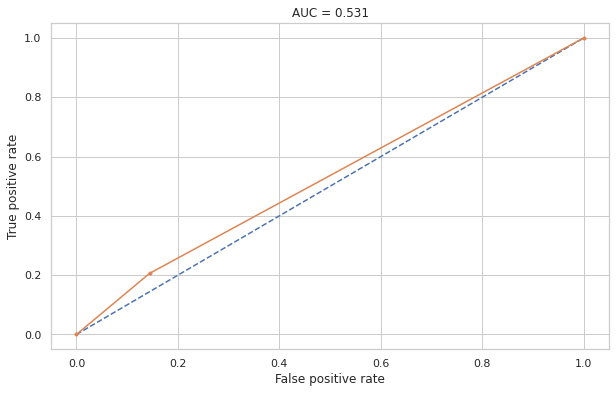

In [ ]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()